# Working with Tweets

In this notebook, we will delve into the analysis of tweet contents.

We consider the dataset of tweets from Elon Musk, SpaceX and Tesla founder, and ask the following questions:
* What is Elon most actively tweeting about?
* Who is Elon most frequently referring to?

We will explore how to work with the contents of tweets.

In [1]:
# imports

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

Let's get some basics (or a refresher) of working with texts in Python. Texts are sequences of discrete symbols (words or, more generically, tokens).

## Import the dataset

```{note}
More info on how to harvest tweets automatically, see Notebook 6. 
```

Let us import the Elon Musk's tweets dataset in memory.

```{image} images/elon_loop.jpeg
:alt: elon
```

In [2]:
# Import the dataset using Pandas, and create a data frame

file_path = 'data/elonmusk_tweets.csv'

df_elon = pd.read_csv(file_path, encoding="utf-8")

In [3]:
df_elon.head(10)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...
5,848415731502923777,2017-04-02 06:04:07,@Lexxxzis It's just a helicopter in helicopter...
6,848415356263702528,2017-04-02 06:02:38,@verge It won't matter
7,848398971139629057,2017-04-02 04:57:31,@SuperCoolCube Pretty good
8,848244577521647616,2017-04-01 18:44:01,Why did we waste so much time developing silly...
9,848243350993895424,2017-04-01 18:39:09,Technology breakthrough: turns out chemtrails ...


In [4]:
df_elon.tail(5)

,id,created_at,text
2814,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw
2815,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa..."
2816,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...
2818,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon..."


In [5]:
df_elon.shape  # (number of rows, number of columns)

(2819, 3)

In [6]:
tweets = df_elon["text"]
tweets_list = list(tweets)  # convert to Python list

for tweet in tweets_list[:10]:
    print(tweet)

And so the robots spared humanity ... https://t.co/v7JUJQWfCv
@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl
@waltmossberg @mims @defcon_5 Et tu, Walt?
Stormy weather in Shortville ...
@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.
@Lexxxzis It's just a helicopter in helicopter's clothing
@verge It won't matter
@SuperCoolCube Pretty good
Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?
Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation


## Working with tweet contents

In [7]:
# import some of the most popular libraries for NLP in Python
import nltk
import string
# import sklearn # for machine learning

ModuleNotFoundError: No module named 'nltk'

```{admonition} Tip
:class: tip
If it is the first time you run nltk, it could be that you have to download its materials first. You only have to do this once. The error tells you which package needs to be downloaded. 
```

In [8]:
# For instance, run this once:
# nltk.download('punkt')

A typical NLP pipeline might look like the following:
    
```{image} images/spacy_pipeline.png
:alt: spacypipeline
```

* Tokenization: split a text into tokens.
* Filtering: remove some of the tokens if not needed (e.g., punctuation). If and how to remove is task dependent.
* Tagger, parser: syntactic structure.
* NER (Named Entity Recognition): find named entities.
* ...

More on this can be found in Notebook 7.

### Tokenization: splitting a text into constituent tokens.
A tokenizer takes a string and outputs a list of tokens.

In [9]:
# NLTK provides us with a tokenizers for tweets

from nltk.tokenize import TweetTokenizer, word_tokenize

tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

ModuleNotFoundError: No module named 'nltk'

In [10]:
example_tweet = df_elon.text[1]
print(example_tweet)

@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl


We compare here two tokenizers: one for general English texts, and one specialized for tweets.

In [11]:
# This one was defined above and is the 'TweetTokenizer'
result1 = tokenizer.tokenize(example_tweet)
print(result1)

print("\n======\n")

# This is a 'normal' tokenizer
result2 = word_tokenize(example_tweet)
print(result2)

NameError: name 'tokenizer' is not defined

**Question**: can you spot what the Twitter tokenizer is doing instead of a standard one?

### Filtering unnecessary tokens

In [12]:
string.punctuation

NameError: name 'string' is not defined

In [13]:
# Some more pre-processing

tokenizer = TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False)

def filter_tweet(tokens):
    """
    Normalize a tweet's text by removing punctuation tokens and URls.
    
    Args:
        tokens (list): List of tokens from a tokenizer
        
    Returns:
        list: List of non-punctuation and URL tokens
    """
    normalized = []
    
    for token in tokens:
        if token in string.punctuation:
            continue
        elif len(token) <= 3:
            continue
        elif token.startswith(('http', 'www')):
            continue
        else:
            normalized.append(token)
  
    return normalized

def tokenize_tweet(tweet, tokenizer=tokenizer):
    
    # This gives a list of tokens
    tokens = tokenizer.tokenize(tweet)
    filtered_tokens = filter_tweet(tokens)
    
    # This returns it back to a string
    normalized_tweet = " ".join(filtered_tokens)
    
    return normalized_tweet

NameError: name 'TweetTokenizer' is not defined

In [14]:
print(result1)  # recall from some cells above
print("======")
print(filter_tweet(result1))  # the result of our normalization function

NameError: name 'result1' is not defined

Now, add a column with a normalized version of the `text` column. 

Let's call it `clean_text`. We get this by applying (using Pandas' `.apply()` method) our just written function on every value of the column.

In [15]:
df_elon["clean_text"] = df_elon["text"].apply(tokenize_tweet)

NameError: name 'tokenize_tweet' is not defined

In [16]:
df_elon.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...


In [17]:
# Save cleaned up version

# df_elon.to_csv("stuff/df_elon.csv", index=False)

### Building a dictionary with token occurrences

We want to build a dictionary of unique tokens, containing the number of times they appear in the corpus.

In [18]:
from collections import Counter

all_tokens = []  # empty list

for tweet in df_elon["clean_text"]:
    all_tokens += tweet.split()

KeyError: 'clean_text'

In [19]:
all_tokens[:10]

[]

In [20]:
counter = Counter(all_tokens)

In [21]:
counter["robots"]

0

#### Quiz

* Find the tokens most used by Elon.
* Find the Twitter users most referred to by Elon 

```{admonition} Tip
:class: tip
Use the @ handler to spot users.
```

In [22]:
# Your code here

In [23]:
# Your code here

---

## Data visualization

The `pandas` methods provide integration with the plotting functionalities provided by the `matplotlib` library.

This seamless integration – which is very nice! – hides away from users some of the complexities of `matplotlib`.

However, as there cases where advanced customizations are needed, it's useful to learn the high-level plotting functionalities of `pandas` or `seaborn` as well as being aware of how to perform more advanced customizations by means of `matplotlib`.

Very useful [`matplotlib` cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

And more information on `Seaborn` here: https://seaborn.pydata.org/

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 5)})

ModuleNotFoundError: No module named 'seaborn'

Let's plot the number of tweets mentioning one of the top 10 tokens over time.

In [26]:
df_elon.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...


Right now, the `created_at` column is of type string. Let's convert it to a datetime datatype that can be interpreted as object by Pandas and Python.

In [27]:
# Convert the created_at column to datetime

df_elon['created_at'] = pd.to_datetime(df_elon['created_at'])

In [28]:
df_elon.head(5)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...


Visually, nothing has changed. But, since the element in the `created_at` column is now a datetime object, we can ask for separate bits of this datetimestamp, such as the year only:

In [29]:
# Make a new column with only the year

df_elon["year"] = df_elon['created_at'].dt.year

In [30]:
df_elon.head()

,id,created_at,text,year
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,2017
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",2017
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,2017
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,2017


Now, make another column that either contains the frequency of the token 'Tesla' in the tweet.

You can do this by using pure Python:

In [31]:
tesla_in_tweet = []

for tweet in df_elon['clean_text']:
    tesla_in_tweet.append(tweet.count('Tesla'))
        
df_elon['tesla_in_tweet'] = tesla_in_tweet

KeyError: 'clean_text'

... and the variant with a list comprehension:

In [32]:
tesla_in_tweet = [tweet.count('Tesla') for tweet in df_elon['clean_text']]
df_elon['tesla_in_tweet'] = tesla_in_tweet

KeyError: 'clean_text'

Or, by using a built-in Pandas method:

In [33]:
df_elon['tesla_in_tweet'] = df_elon['clean_text'].str.count('Tesla')

KeyError: 'clean_text'

The result is yet an extra column:

In [34]:
df_elon.head(5)

,id,created_at,text,year
0,849636868052275200,2017-04-05 14:56:29,And so the robots spared humanity ... https://...,2017
1,848988730585096192,2017-04-03 20:01:01,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017
2,848943072423497728,2017-04-03 16:59:35,"@waltmossberg @mims @defcon_5 Et tu, Walt?",2017
3,848935705057280001,2017-04-03 16:30:19,Stormy weather in Shortville ...,2017
4,848416049573658624,2017-04-02 06:05:23,@DaveLeeBBC @verge Coal is dying due to nat ga...,2017


Then, let's plot this as a bar plot. What we do:
1. Group everything by the value in the 'year' column
2. Select only the 'tesla_in_tweet' column
3. Sum the values (this is done per group [=per year])

Inspect the result

4. Call `.plot(kind='bar')` on the Series.

What is returned is automatically displayed by Jupyter notebooks

In [35]:
tesla_per_year = df_elon.groupby('year')['tesla_in_tweet'].sum()
tesla_per_year

KeyError: 'Column not found: tesla_in_tweet'

In [36]:
tesla_per_year.plot(kind='bar')

NameError: name 'tesla_per_year' is not defined

Alternatively, you can give this Series to Seaborn:

In [37]:
sns.barplot(x=tesla_per_year.index, y=tesla_per_year.values, color="skyblue")

NameError: name 'sns' is not defined

Some extra styling, a title and a y-axis label. You can even save the result, for instance as .pdf.

In [38]:
sns.barplot(x=tesla_per_year.index, y=tesla_per_year.values, color="skyblue")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of tweets mentioning Tesla", fontsize=14)
plt.tight_layout()

plt.savefig("stuff/elon_plot.pdf")

NameError: name 'sns' is not defined

**Another question:** how many tweets are there per month over time? 

We need to change the index and group. Let's make the datetimestamp the index of our DataFrame.

In [39]:
df_elon = df_elon.set_index('created_at')

In [40]:
df_elon.head(5)

,id,text,year
created_at,,,
2017-04-05 14:56:29,849636868052275200,And so the robots spared humanity ... https://...,2017
2017-04-03 20:01:01,848988730585096192,@ForIn2020 @waltmossberg @mims @defcon_5 Exact...,2017
2017-04-03 16:59:35,848943072423497728,"@waltmossberg @mims @defcon_5 Et tu, Walt?",2017
2017-04-03 16:30:19,848935705057280001,Stormy weather in Shortville ...,2017
2017-04-02 06:05:23,848416049573658624,@DaveLeeBBC @verge Coal is dying due to nat ga...,2017


Pandas has a `Grouper` method that for instance allows you to easily work with datetimestamps. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html for some examples. 

We use it to group per month which we do by specifying `freq='M'`. In steps:
1. First, we group by the month using the `pd.Grouper(freq='M'))` method
2. Then we count the number of rows per month using `.count()`
3. Since we are only interested in the count, we can select any row, for instance 'id'

In [41]:
tweets_per_month = df_elon.groupby(pd.Grouper(freq='M')).count()['id']
tweets_per_month

created_at
2010-06-30      1
2010-07-31      0
2010-08-31      0
2010-09-30      0
2010-10-31      0
             ... 
2016-12-31     50
2017-01-31    107
2017-02-28    137
2017-03-31    120
2017-04-30     13
Freq: M, Name: id, Length: 83, dtype: int64

<AxesSubplot:xlabel='created_at'>

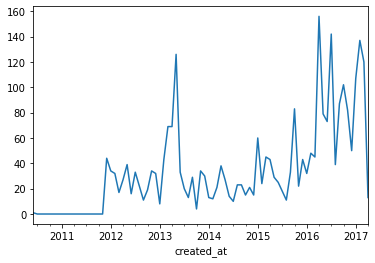

In [42]:
tweets_per_month.plot()

**Remark**: there is much more to this than plotting. Take a loot at the [Seaborn](https://seaborn.pydata.org/examples/index.html) or [Matplotlib](https://matplotlib.org/gallery.html) galleries for some compelling examples.

---

### Anatomy of a plot (optional)

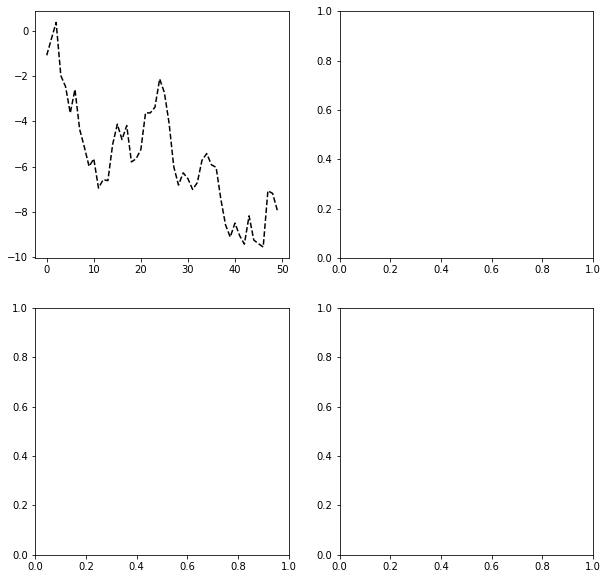

In [43]:
# First we create the figure, which is the 
# container where all plots reside

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.show()

Each plot resides within a `Figure` object.

Each subsplot resides within an `AxesSubplot` object.

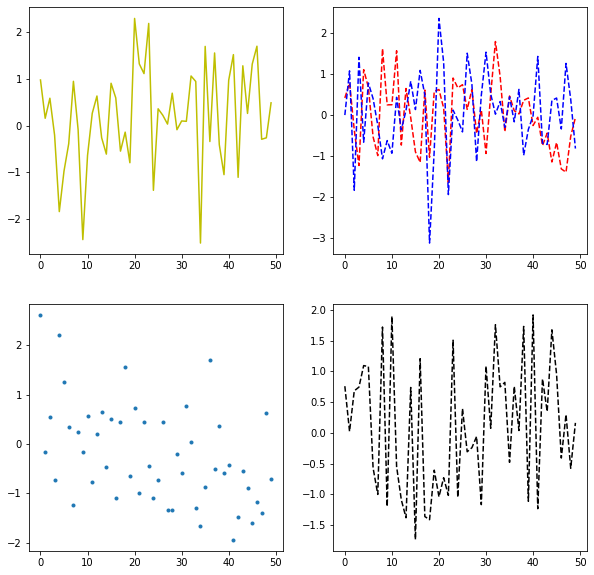

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,1].plot(np.random.randn(50), 'r--')
axes[0,1].plot(np.random.randn(50), 'b--')
axes[1,1].plot(np.random.randn(50), 'k--')
axes[1,0].plot(np.random.randn(50), '.')
axes[0,0].plot(np.random.randn(50), 'y-')
fig.set_size_inches(10, 10)

---

### Exercise 1.

With these tweets:
* Plot the top n words together in a single figure, and show their trends over time.
* Do the same for the top n users mentioned.

In [45]:
# Your code here

---